In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('bond_lenght.csv')

In [4]:
df

,Atom,EXP,AM1,PM3,INDO,PM3MM,B3LYP/6-311G,B3LYP/LanL2DZ
0,S1-C1,1.6957,1.87,1.88,1.83,1.88,1.83,1.92
1,N1-C1,1.3416,1.45,1.48,1.45,1.48,1.45,1.45
2,N1-C11,1.4276,1.41,1.44,1.43,1.44,1.43,1.40
3,N1-H1,0.8800,1.00,1.00,1.03,1.00,1.03,1.01
4,C11-C16,1.3967,1.42,1.40,1.41,1.40,1.41,1.40
5,C11-C12,1.3697,1.39,1.39,1.40,1.39,1.40,1.41
6,C12-C-13,1.3917,1.40,1.40,1.41,1.40,1.41,1.40
7,C13-C14,1.3868,1.39,1.39,1.40,1.39,1.40,1.41
8,C14-C15,1.3878,1.90,1.40,1.41,1.40,1.41,1.40
9,C15-C16,1.3897,1.39,1.39,1.40,1.39,1.40,1.41


In [5]:
df.set_index('Atom')

,EXP,AM1,PM3,INDO,PM3MM,B3LYP/6-311G,B3LYP/LanL2DZ
Atom,,,,,,,
S1-C1,1.6957,1.87,1.88,1.83,1.88,1.83,1.92
N1-C1,1.3416,1.45,1.48,1.45,1.48,1.45,1.45
N1-C11,1.4276,1.41,1.44,1.43,1.44,1.43,1.40
N1-H1,0.8800,1.00,1.00,1.03,1.00,1.03,1.01
C11-C16,1.3967,1.42,1.40,1.41,1.40,1.41,1.40
C11-C12,1.3697,1.39,1.39,1.40,1.39,1.40,1.41
C12-C-13,1.3917,1.40,1.40,1.41,1.40,1.41,1.40
C13-C14,1.3868,1.39,1.39,1.40,1.39,1.40,1.41
C14-C15,1.3878,1.90,1.40,1.41,1.40,1.41,1.40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Atom           15 non-null     object 
 1   EXP            15 non-null     float64
 2   AM1            15 non-null     float64
 3   PM3            15 non-null     float64
 4   INDO           15 non-null     float64
 5   PM3MM          15 non-null     float64
 6   B3LYP/6-311G   15 non-null     float64
 7   B3LYP/LanL2DZ  15 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.1+ KB


In [13]:
corr_coeff = df.corr(method='pearson', numeric_only=True)

In [14]:
print(f'Correlation coefficient: {corr_coeff}')

Correlation coefficient:                     EXP       AM1       PM3      INDO     PM3MM  B3LYP/6-311G  \
EXP            1.000000  0.879243  0.961165  0.978888  0.961165      0.978888   
AM1            0.879243  1.000000  0.877524  0.886374  0.877524      0.886374   
PM3            0.961165  0.877524  1.000000  0.995790  1.000000      0.995790   
INDO           0.978888  0.886374  0.995790  1.000000  0.995790      1.000000   
PM3MM          0.961165  0.877524  1.000000  0.995790  1.000000      0.995790   
B3LYP/6-311G   0.978888  0.886374  0.995790  1.000000  0.995790      1.000000   
B3LYP/LanL2DZ  0.958259  0.875734  0.996778  0.994926  0.996778      0.994926   

               B3LYP/LanL2DZ  
EXP                 0.958259  
AM1                 0.875734  
PM3                 0.996778  
INDO                0.994926  
PM3MM               0.996778  
B3LYP/6-311G        0.994926  
B3LYP/LanL2DZ       1.000000  


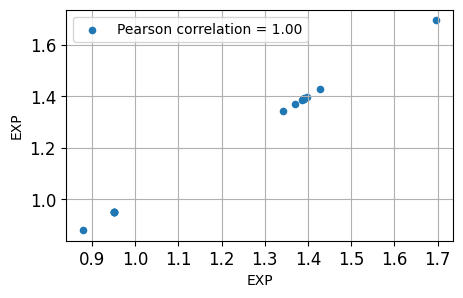

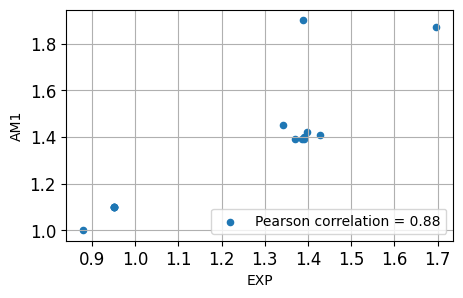

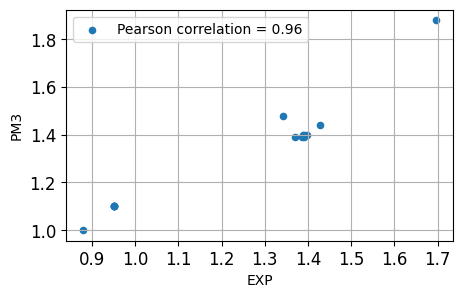

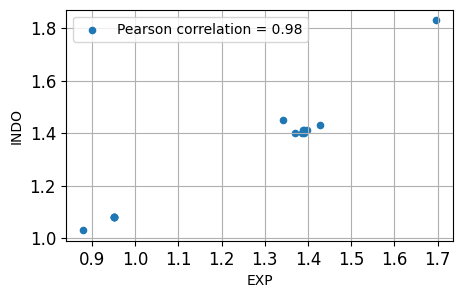

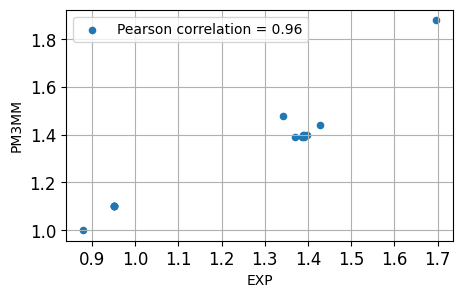

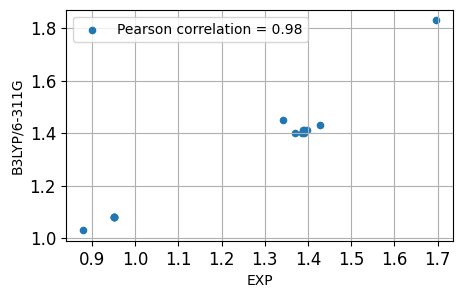

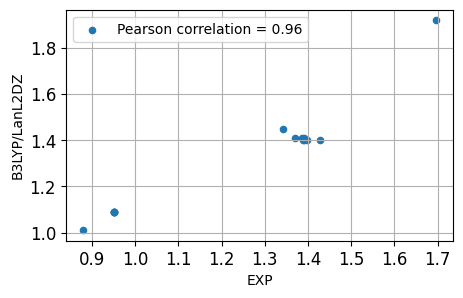

In [24]:
for col in df.columns[1:]:
    # Calculate Pearson correlation coefficient
    corr_coeff = df['EXP'].corr(df[col])
    
    # Create scatter plot
    df.plot.scatter('EXP', col, label=f'Pearson correlation = {corr_coeff:.2f}',
                    figsize=(5, 3), subplots=True, style='o', fontsize=12, grid=True)

plt.show()

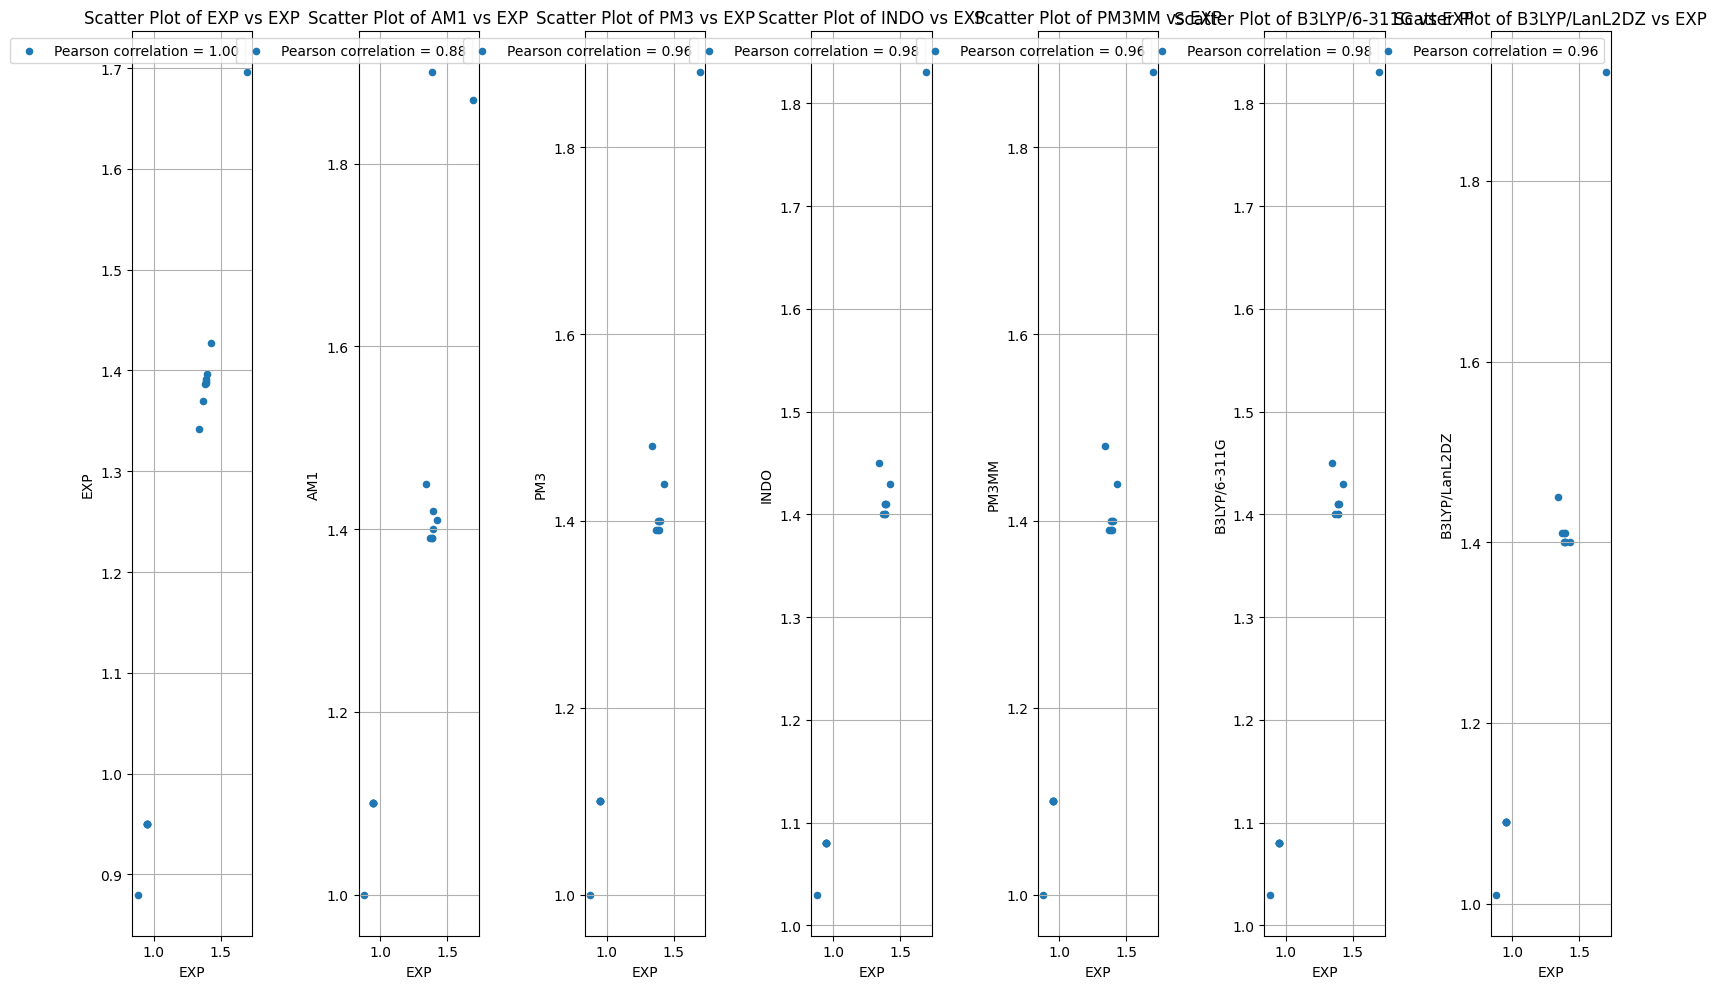

In [33]:
# Get the number of columns (excluding the 'EXP' column)
num_cols = len(df.columns) - 1

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(16, 10))

# Loop over DataFrame columns (excluding the 'EXP' column)
for i, col in enumerate(df.columns[1:]):
    # Calculate Pearson correlation coefficient
    corr_coeff = df['EXP'].corr(df[col])
    
    # Create scatter plot on the appropriate subplot
    ax = axes[i]
    df.plot.scatter('EXP', col, label=f'Pearson correlation = {corr_coeff:.2f}', ax=ax, style='o', grid=True)
    ax.set_xlabel('EXP')
    ax.set_ylabel(col)
    ax.set_title(f'Scatter Plot of {col} vs EXP')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

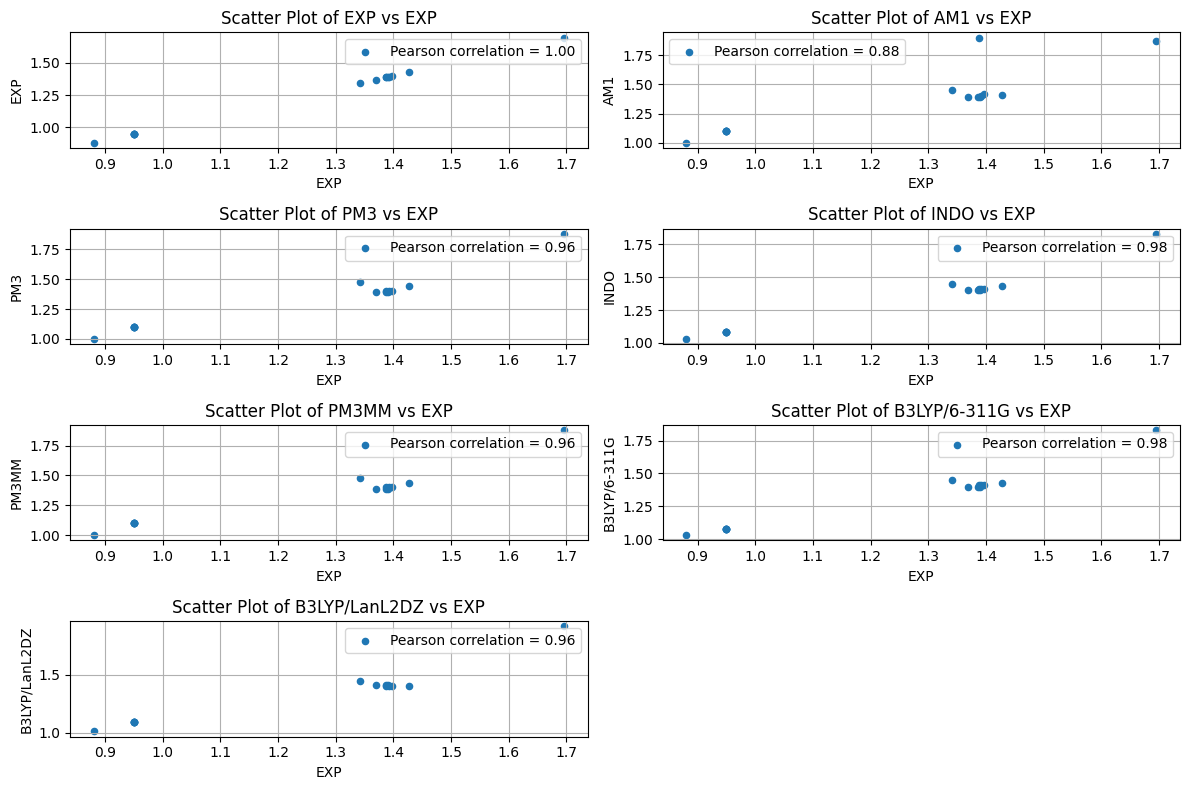

In [35]:
# Get the number of columns (excluding the 'EXP' column)
num_cols = len(df.columns) - 1

# Calculate the number of rows needed
num_rows = (num_cols + 1) // 2

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop over DataFrame columns (excluding the 'EXP' column)
for i, col in enumerate(df.columns[1:]):
    # Calculate Pearson correlation coefficient
    corr_coeff = df['EXP'].corr(df[col])
    
    # Create scatter plot on the appropriate subplot
    ax = axes[i]
    df.plot.scatter('EXP', col, label=f'Pearson correlation = {corr_coeff:.2f}', ax=ax, style='o', grid=True)
    ax.set_xlabel('EXP')
    ax.set_ylabel(col)
    ax.set_title(f'Scatter Plot of {col} vs EXP')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlap
plt.tight_layout()

#plt.show()
plt.savefig('fig1.svg', bbox_inches='tight')

/tmp/ipykernel_2284/3969973958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm').plot(rot=(0), figsize=(15,10), style=['classic'])


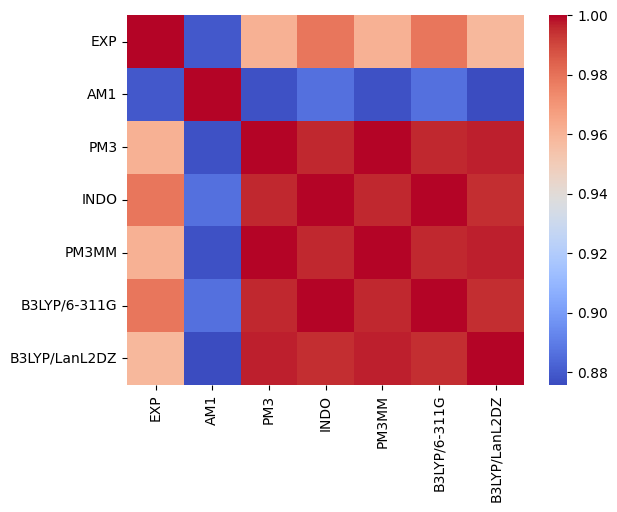

In [36]:
sns.heatmap(df.corr(), cmap='coolwarm').plot(rot=(0), figsize=(15,10), style=['classic'])

#plt.title('corr() of Domestic Extraction with biomass usage, number of planters, import and exports')

plt.savefig('fig2.svg', bbox_inches='tight')